In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score


In [2]:
df = pd.read_csv("heart.csv")


Overview of Dataset

In [3]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [4]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [5]:
#No null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Correlation between target and other features
df.corr()["target"].sort_values()


oldpeak    -0.438441
exang      -0.438029
ca         -0.382085
thal       -0.337838
sex        -0.279501
age        -0.229324
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
slope       0.345512
thalach     0.422895
cp          0.434854
target      1.000000
Name: target, dtype: float64

DATA VISUALIZATION


<AxesSubplot:>

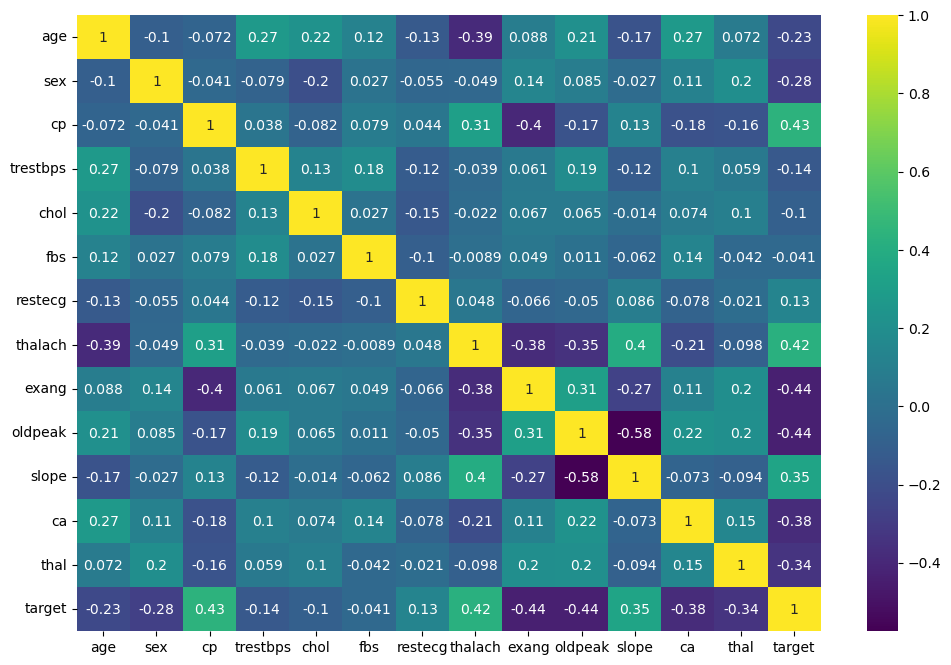

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

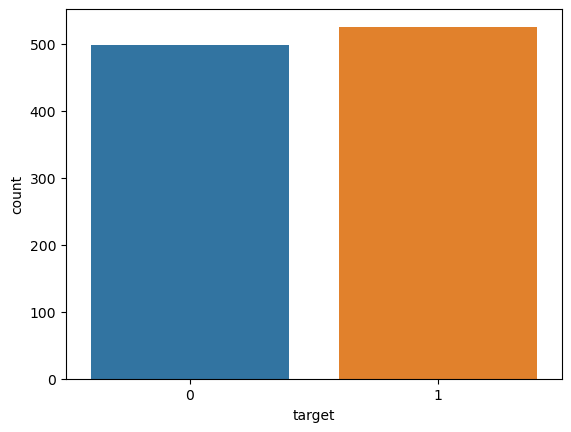

In [8]:
#Value counts of each target
sns.countplot(data=df,x="target")
plt.show()


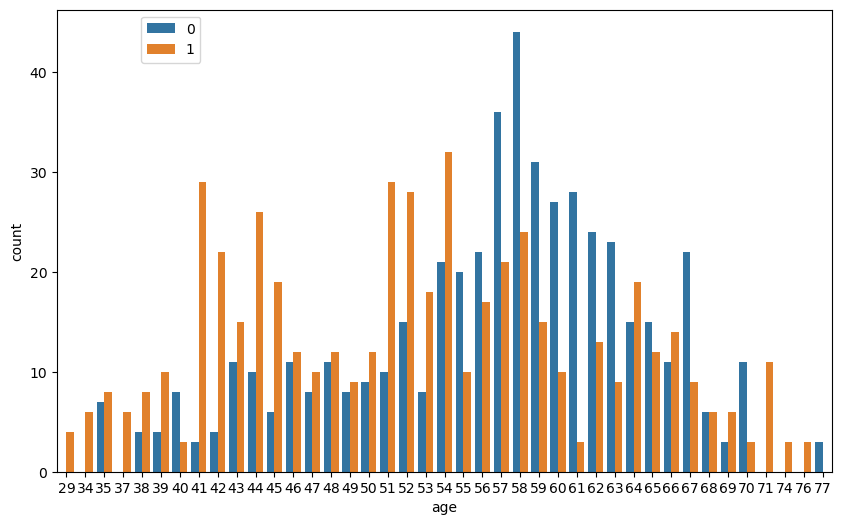

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="age",hue="target")
plt.legend(bbox_to_anchor=(0.10,1))
plt.show()


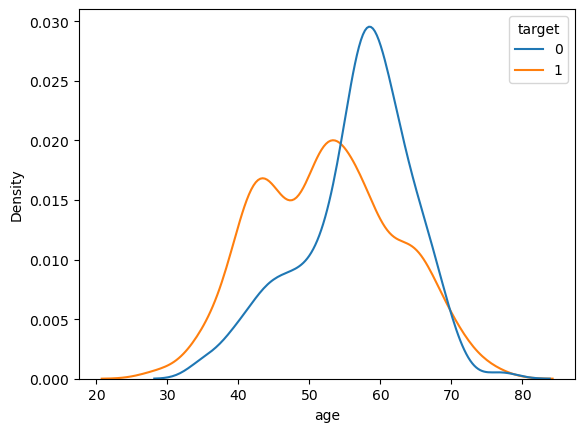

In [10]:
sns.kdeplot(data=df,x="age",hue="target")
plt.show()

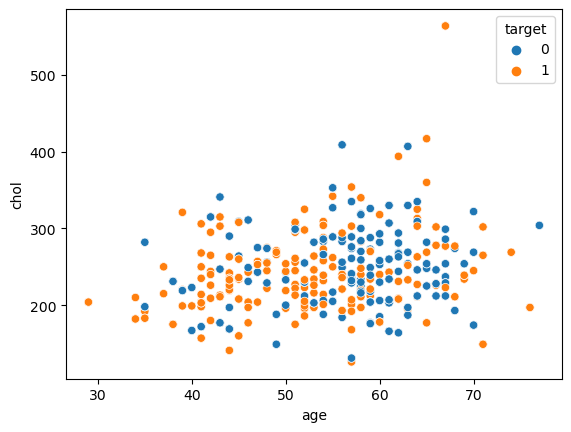

In [11]:
sns.scatterplot(data=df,x="age",y="chol",hue="target")
plt.show()

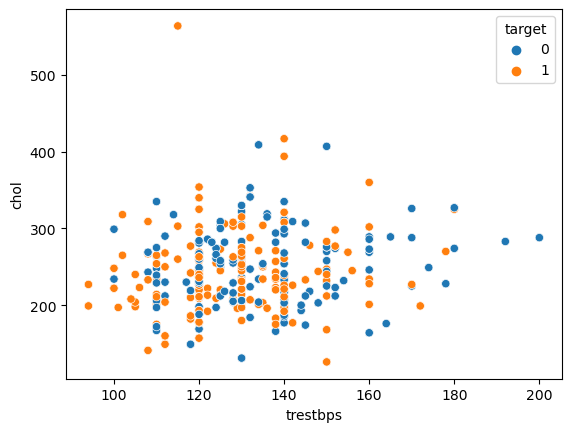

In [12]:
sns.scatterplot(data=df,x="trestbps",y="chol",hue="target")
plt.show()

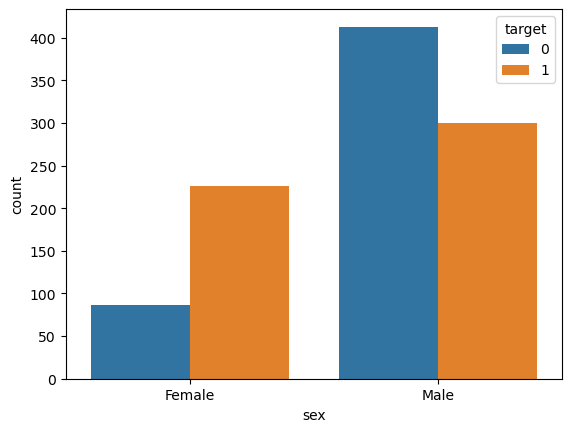

In [13]:
g = sns.countplot(data=df,x="sex",hue="target")
g.set_xticklabels(["Female","Male"])
plt.show()


Separating features and labels and performing train-test split

In [14]:
X = df.drop("target",axis=1)
y = df["target"]

In [15]:
#Overview of features
X[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2


In [16]:
#Overview of labels 
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: target, dtype: int64

In [17]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
#Scaling the data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

K Nearest Neighbors

In [20]:
knn = KNeighborsClassifier()

In [21]:
#Generating K values
k_values = np.arange(1,51)
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [22]:
param_grid = {"n_neighbors":k_values}

In [23]:
#Running grid search to compute the best value for n_neighbors 
grid_model = GridSearchCV(knn,param_grid=param_grid,cv=5,scoring="accuracy")

In [24]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [25]:
#Result of grid search
grid_model.best_params_

{'n_neighbors': 1}

In [26]:
y_pred_train = grid_model.predict(scaled_X_train)
y_pred_test = grid_model.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,y_pred_test)

array([[58,  0],
       [ 3, 42]], dtype=int64)

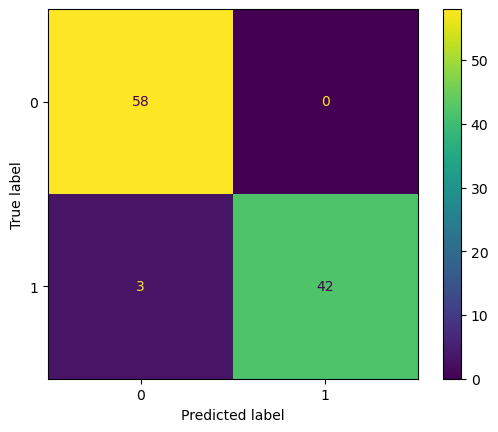

In [28]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [29]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



In [30]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_pred_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_pred_test))

Accuracy score for training data:  1.0
Accuracy score for testing data:  0.970873786407767


This is not a suitable classification model for this dataset because it has too many features. KNN performs best with low number of features. Hence, we will not take KNN into account.

Logistic regression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [33]:
y_log_train = log_model.predict(scaled_X_train)
y_log_test = log_model.predict(scaled_X_test)

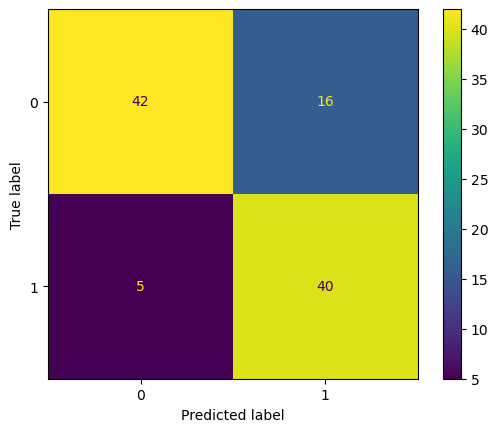

In [34]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)


In [35]:
print(classification_report(y_test,y_log_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        58
           1       0.71      0.89      0.79        45

    accuracy                           0.80       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.80      0.80       103



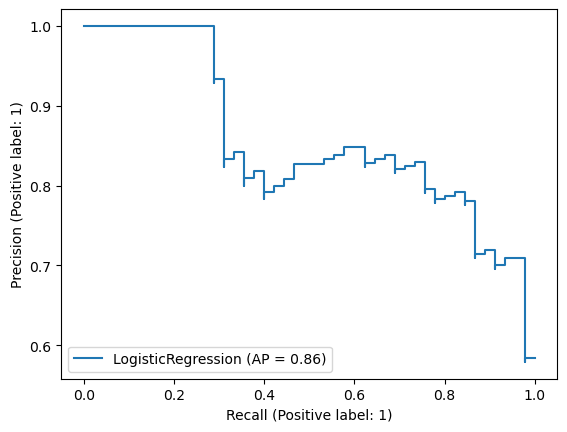

In [36]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

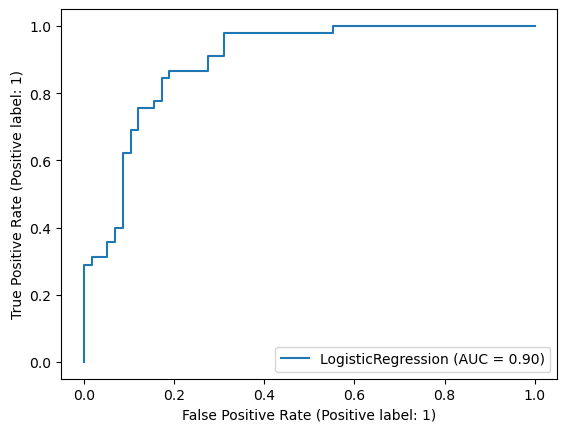

In [37]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [38]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_log_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_log_test))

Accuracy score for training data:  0.8503253796095445
Accuracy score for testing data:  0.7961165048543689


Decision Trees

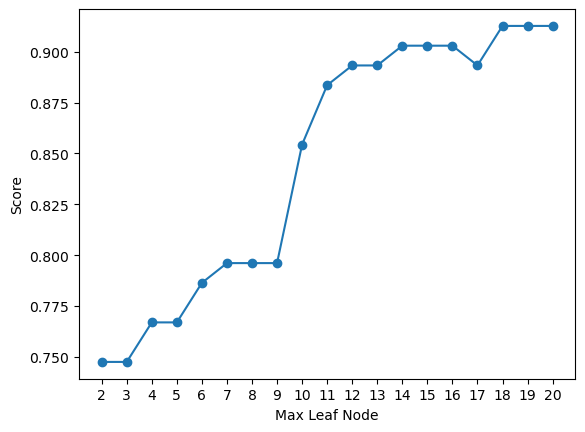

In [39]:
#Determining ideal value for max_leaf_nodes
scoreList = []
for i in range(2,21):
    dt = DecisionTreeClassifier(max_leaf_nodes = i) 
    dt.fit(X_train, y_train)
    scoreList.append(dt.score(X_test, y_test))
    
plt.plot(range(2,21), scoreList,marker="o")
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

The value chosen for max_leaf_nodes=12 as it has good accuracy and optimal model complexity. With increasing value of max_leaf_nodes, model complexity increases which is not ideal.

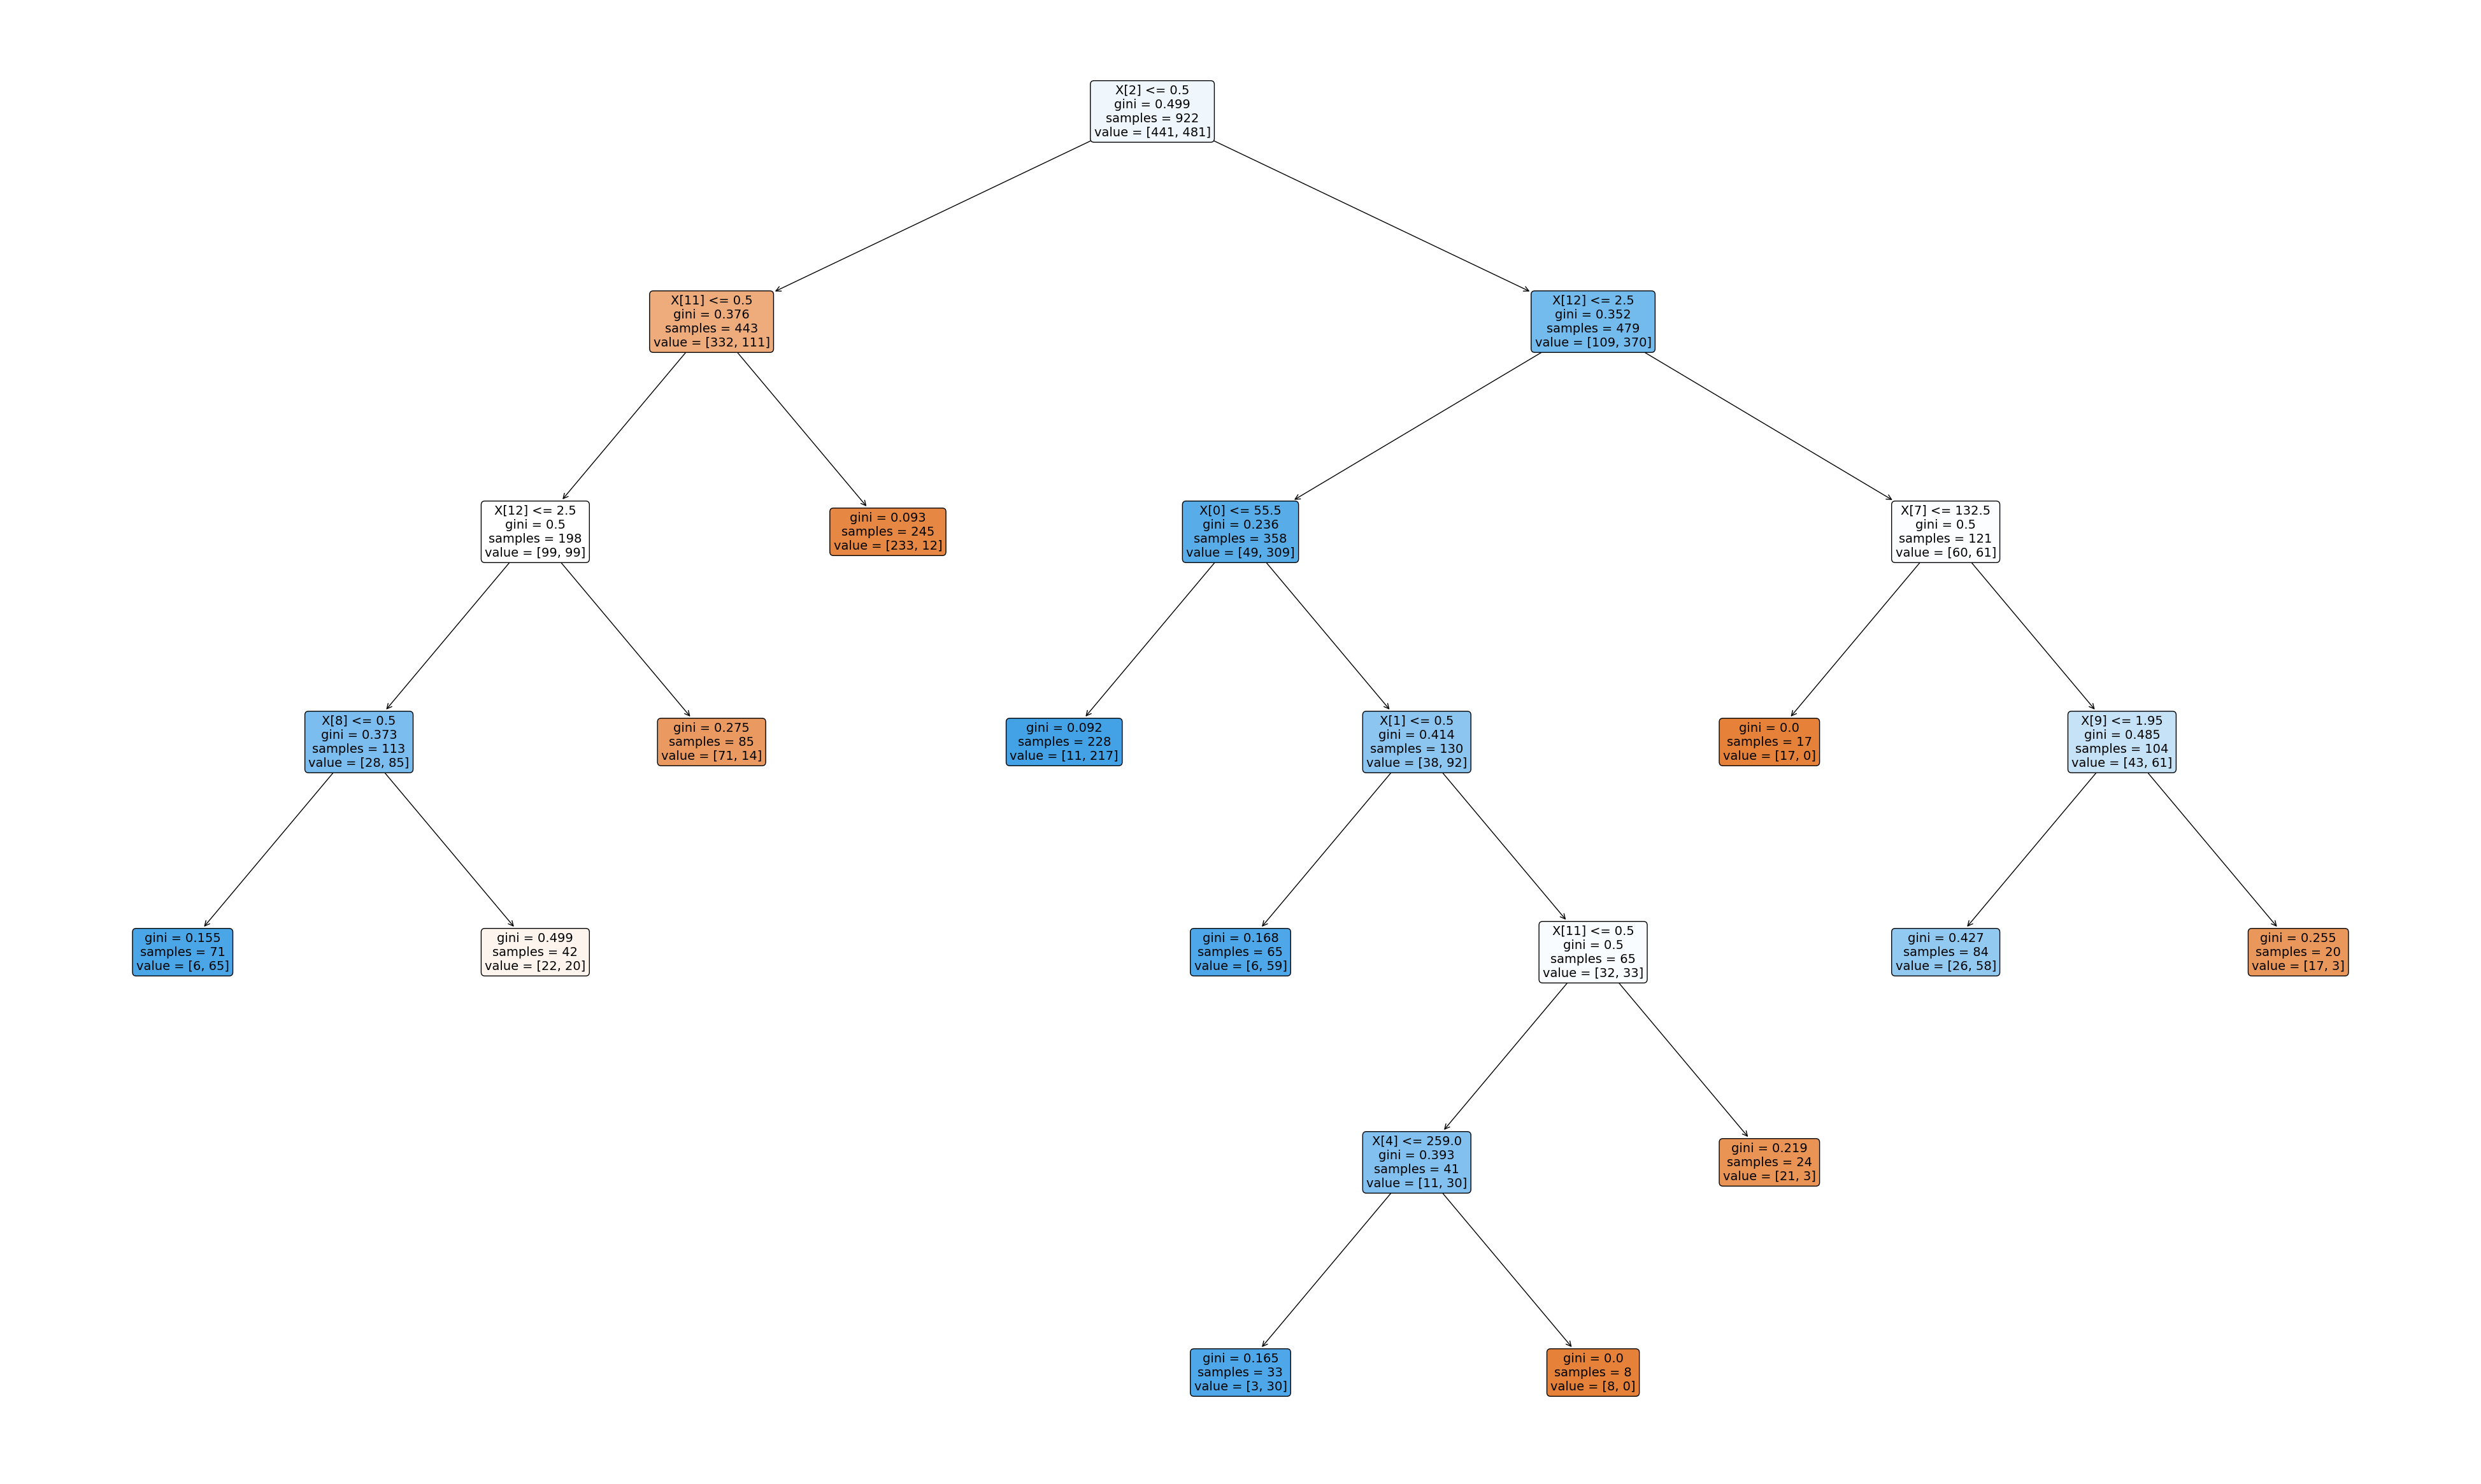

In [40]:
DT = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
DT = DT.fit(X_train,y_train)
plt.figure(figsize=(50,30))
a = plot_tree(DT,filled=True, rounded=True, fontsize=14)

In [41]:
y_dt_train = DT.predict(X_train)
y_dt_test = DT.predict(X_test)

In [42]:
print(classification_report(y_test,y_dt_test))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.87      0.89      0.88        45

    accuracy                           0.89       103
   macro avg       0.89      0.89      0.89       103
weighted avg       0.89      0.89      0.89       103



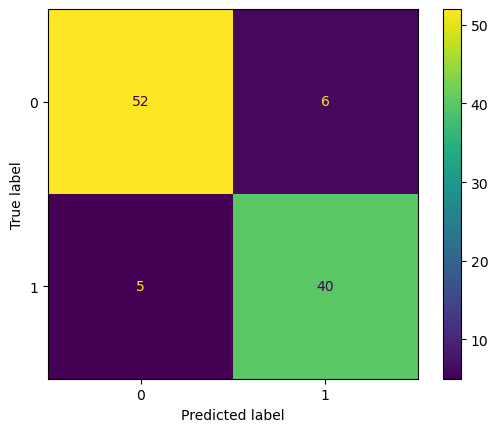

In [43]:
plot_confusion_matrix(DT,X_test,y_test)

In [44]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_dt_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_dt_test))

Accuracy score for training data:  0.8872017353579176
Accuracy score for testing data:  0.8932038834951457


SVM

In [45]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print('Accuracy for training data: {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for testing data: {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Accuracy for training data: 0.7266811279826464
Accuracy for testing data: 0.6796116504854369


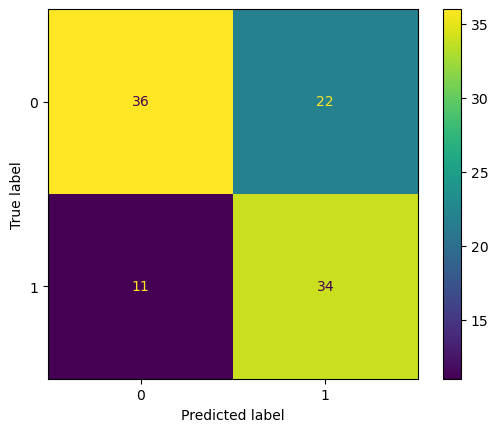

In [46]:
plot_confusion_matrix(classifier,X_test,y_test)

Naive Bayes

In [47]:
bayes_model = GaussianNB()

In [48]:
bayes_model.fit(X_train,y_train)

GaussianNB()

In [49]:
y_bayes_train = bayes_model.predict(scaled_X_train)
y_bayes_test = bayes_model.predict(scaled_X_test)

In [50]:
print(classification_report(y_test,y_bayes_test))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        58
           1       1.00      0.02      0.04        45

    accuracy                           0.57       103
   macro avg       0.78      0.51      0.38       103
weighted avg       0.76      0.57      0.43       103



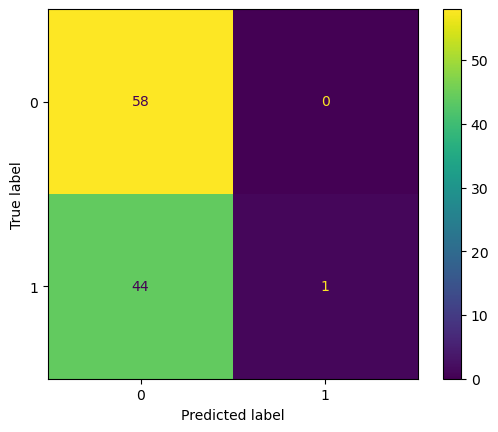

In [51]:
plot_confusion_matrix(bayes_model,scaled_X_test,y_test)

In [52]:
print("Accuracy score for training data: ",accuracy_score(y_train,y_bayes_train))
print("Accuracy score for testing data: ",accuracy_score(y_test,y_bayes_test))

Accuracy score for training data:  0.4793926247288503
Accuracy score for testing data:  0.5728155339805825


After analysing the accuracy scores for all the models, we can deduce that Decision Trees is the best classifier for this dataset.